<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/TinySOL/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import json

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/TinySOL/features.csv',header=None)

In [3]:
y = pd.read_csv('/content/gdrive/MyDrive/csv_data/TinySOL/labels.csv', header=None)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

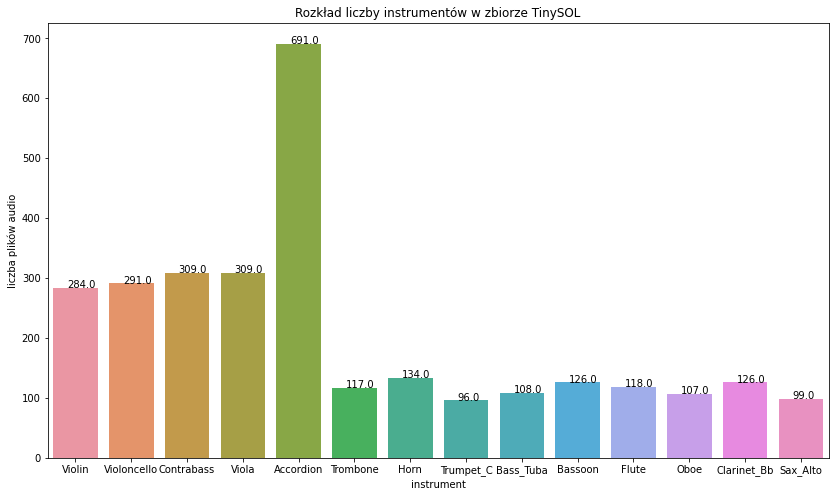

In [12]:
plt.figure(figsize=(14,8))

plt.title("Rozkład liczby instrumentów w zbiorze TinySOL")
ax = sns.countplot(x=y[0])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.ylabel("liczba plików audio")
plt.xlabel("instrument")
plt.show()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_mod = LogisticRegression(max_iter=10000)

In [ ]:
log_reg_mod.fit(X_train, np.array(y_train).flatten())

LogisticRegression(max_iter=10000)

In [ ]:
y_pre_lg = log_reg_mod.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pre_lg))

              precision    recall  f1-score   support

   Accordion       1.00      1.00      1.00       204
   Bass_Tuba       1.00      1.00      1.00        36
     Bassoon       1.00      1.00      1.00        38
 Clarinet_Bb       1.00      1.00      1.00        37
  Contrabass       0.97      1.00      0.98        98
       Flute       1.00      1.00      1.00        36
        Horn       1.00      1.00      1.00        40
        Oboe       1.00      1.00      1.00        28
    Sax_Alto       1.00      1.00      1.00        25
    Trombone       1.00      1.00      1.00        30
   Trumpet_C       1.00      1.00      1.00        31
       Viola       1.00      1.00      1.00       103
      Violin       1.00      1.00      1.00        96
 Violoncello       1.00      0.96      0.98        73

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(X_train, np.array(y_train).flatten())

KNeighborsClassifier(n_neighbors=4)

In [ ]:
print(classification_report(y_test,neigh.predict(X_test)))

              precision    recall  f1-score   support

   Accordion       1.00      1.00      1.00       204
   Bass_Tuba       1.00      1.00      1.00        36
     Bassoon       0.97      0.92      0.95        38
 Clarinet_Bb       0.95      1.00      0.97        37
  Contrabass       0.95      1.00      0.98        98
       Flute       1.00      1.00      1.00        36
        Horn       0.93      0.93      0.93        40
        Oboe       0.96      0.96      0.96        28
    Sax_Alto       0.92      0.88      0.90        25
    Trombone       0.88      0.97      0.92        30
   Trumpet_C       1.00      1.00      1.00        31
       Viola       0.91      0.96      0.93       103
      Violin       0.99      0.91      0.95        96
 Violoncello       0.99      0.92      0.95        73

    accuracy                           0.97       875
   macro avg       0.96      0.96      0.96       875
weighted avg       0.97      0.97      0.97       875



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=14)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14)

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

0.7931428571428571

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

   Accordion       0.90      0.96      0.93       204
   Bass_Tuba       0.85      0.97      0.91        36
     Bassoon       0.69      0.76      0.72        38
 Clarinet_Bb       0.37      0.41      0.38        37
  Contrabass       0.94      0.83      0.88        98
       Flute       0.79      0.53      0.63        36
        Horn       0.53      0.65      0.58        40
        Oboe       0.53      0.64      0.58        28
    Sax_Alto       0.43      0.36      0.39        25
    Trombone       0.68      0.63      0.66        30
   Trumpet_C       0.68      0.48      0.57        31
       Viola       0.89      0.83      0.86       103
      Violin       0.87      0.89      0.88        96
 Violoncello       0.82      0.85      0.83        73

    accuracy                           0.79       875
   macro avg       0.71      0.70      0.70       875
weighted avg       0.80      0.79      0.79       875

